In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import matplotlib.cm as cm

plt.style.use('bmh')


In [3]:
handles = ["@Apple", "@Visa", "@amazon", "@Walmart",'@netflix','@Nike','@Macys']
dataframes = {}

In [4]:
for handle in handles:
    print(f"data/sentiments_{handle}.csv")
    df = pd.read_csv(f"data/sentiments_{handle}.csv")
    df = df.drop("Unnamed: 0",axis=1)
    df = df.reset_index()
    df = df.rename(columns={"index":"id"})
    print(df.columns)
    
    df = df.drop(df[df['compound'] == "compound"].index)
    df = df.dropna(how='any') 
    
    df["compound"] = pd.to_numeric(df["compound"] )
    df["neg"] = pd.to_numeric(df["neg"] )
    df["neu"] = pd.to_numeric(df["neu"] )
    df["pos"] = pd.to_numeric(df["pos"] )
    df["date"] = [datetime.strptime(x,"%a %b %d %H:%M:%S %z %Y").date() for x in df["tweet_date"]]
    
    df = df[["compound","date"]]
    date_group = df.groupby(["date"])
    compound_date = pd.DataFrame(date_group.mean())
    compound_date = compound_date.reset_index()
    
    dataframes.update({handle:compound_date})
    

data/sentiments_@Apple.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@Visa.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@amazon.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@Walmart.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@netflix.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@Nike.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
data/sentiments_@Macys.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')


In [5]:
for key, df in dataframes.items():
    df.plot(kind="line",x="date",y="compound",color="blue",label="compound",marker="o")
    plt.axhline(0.00)
    plt.xlabel("date")
    plt.ylabel("sentiment")
    plt.title(f"Compound Sentiments {key}")
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/Compound_Sentiments_{key}.png")
    

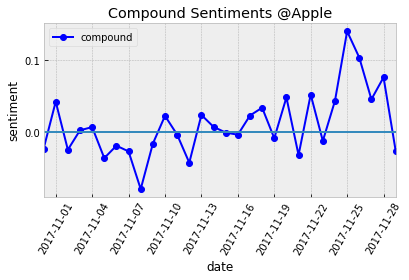

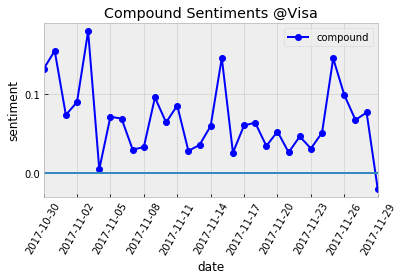

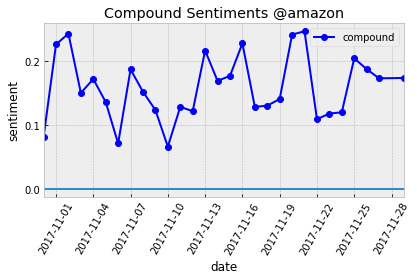

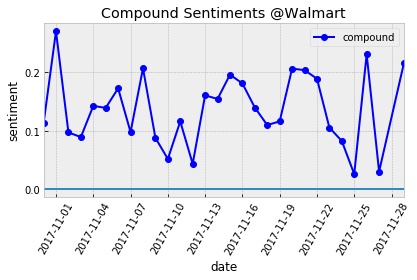

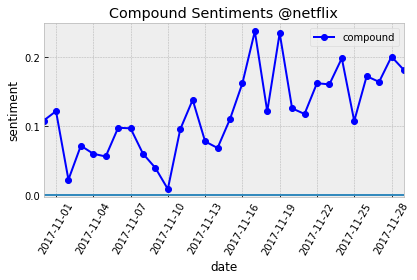

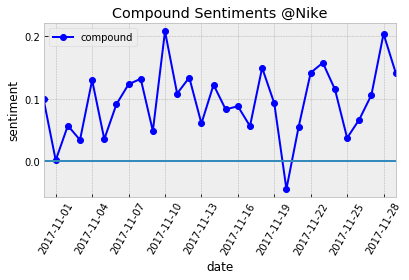

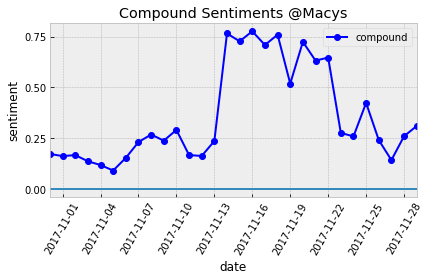

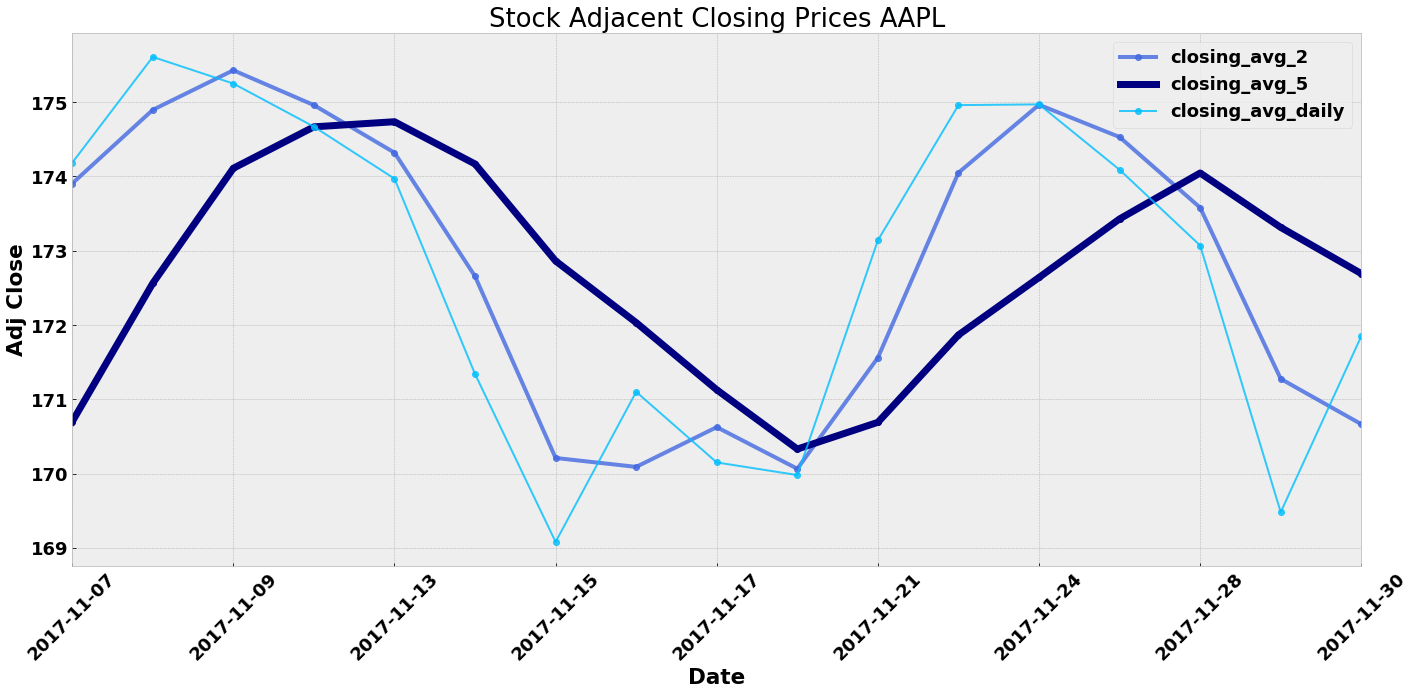

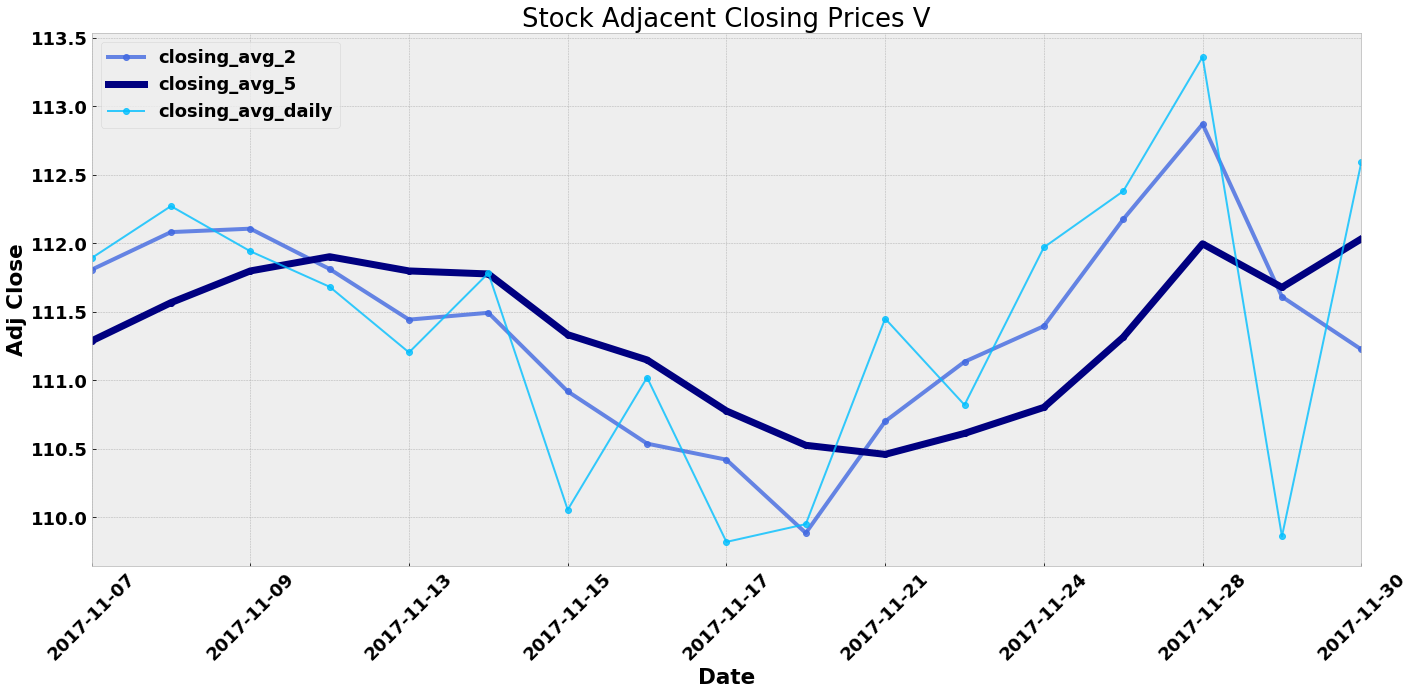

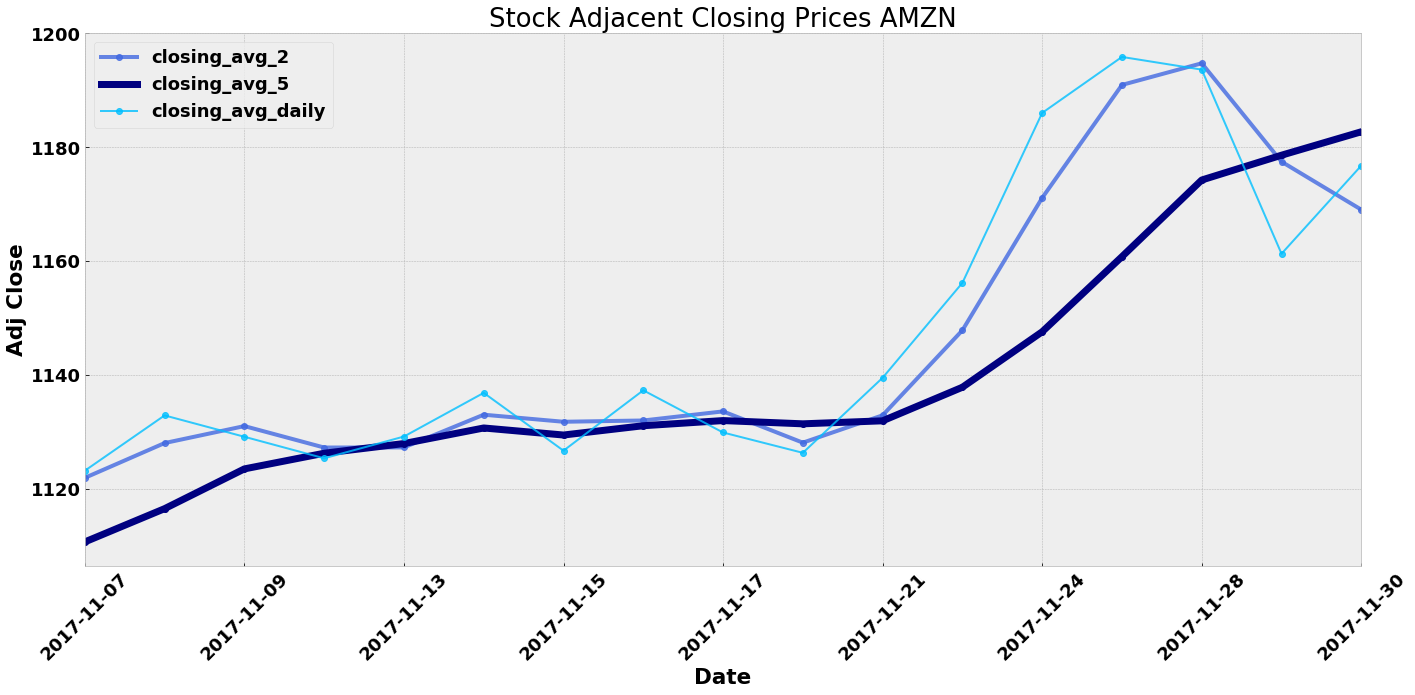

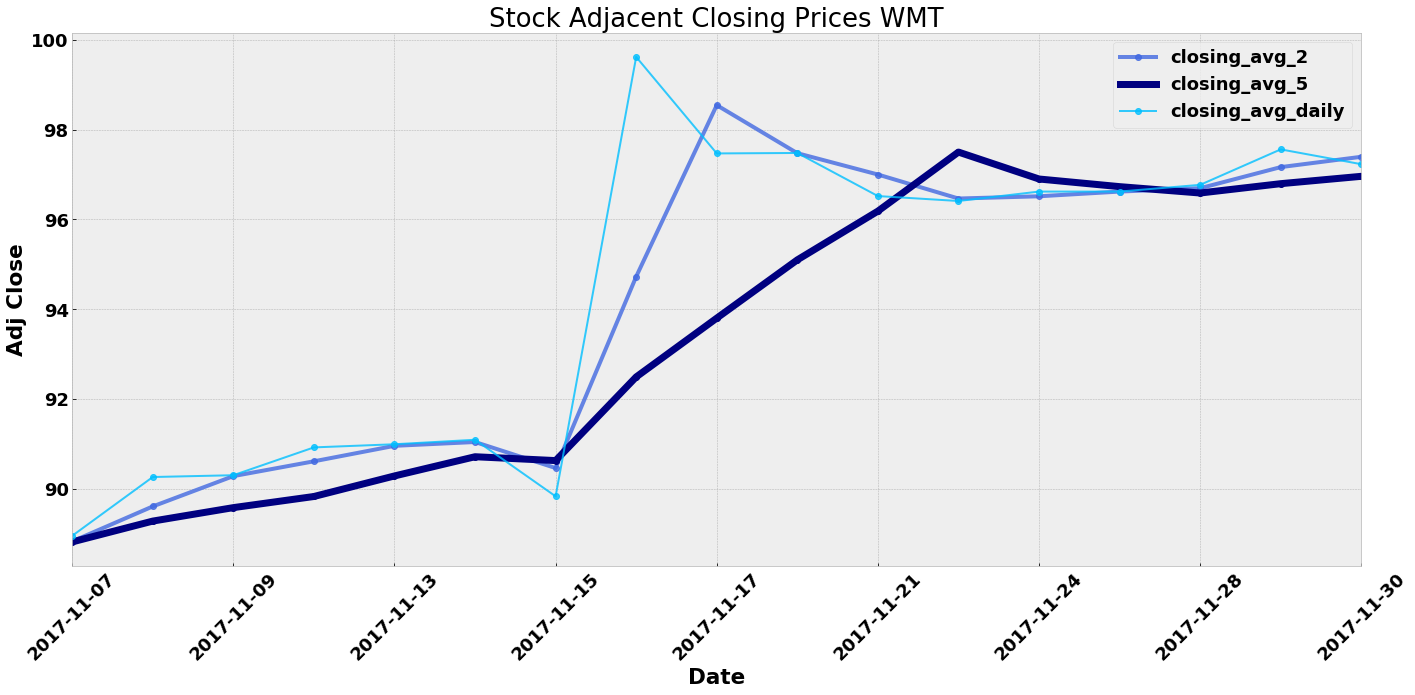

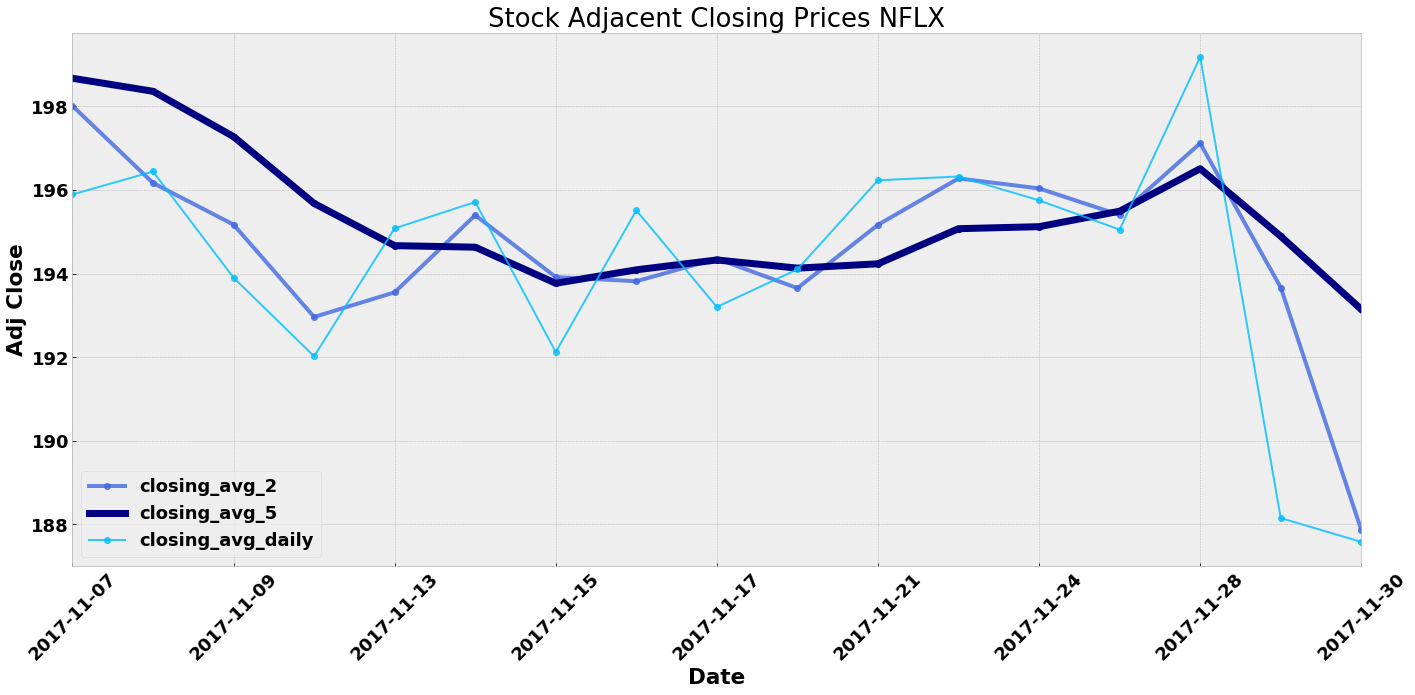

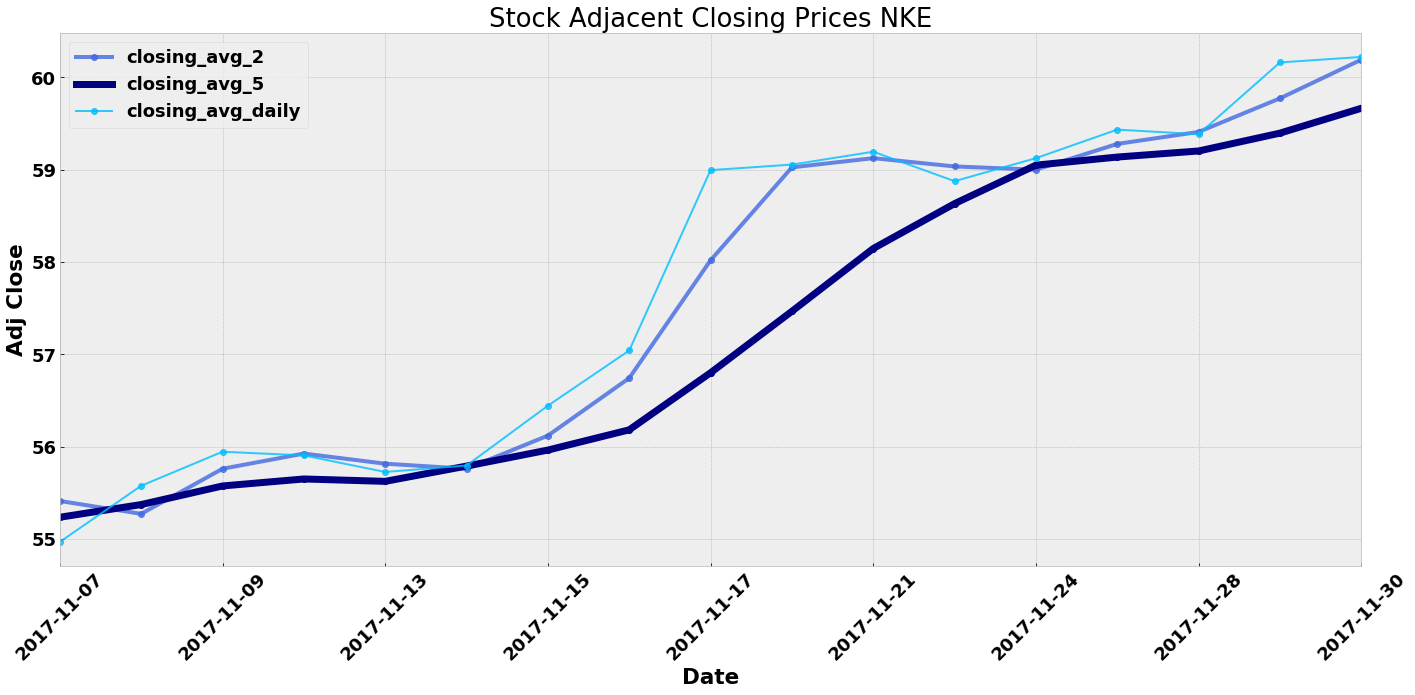

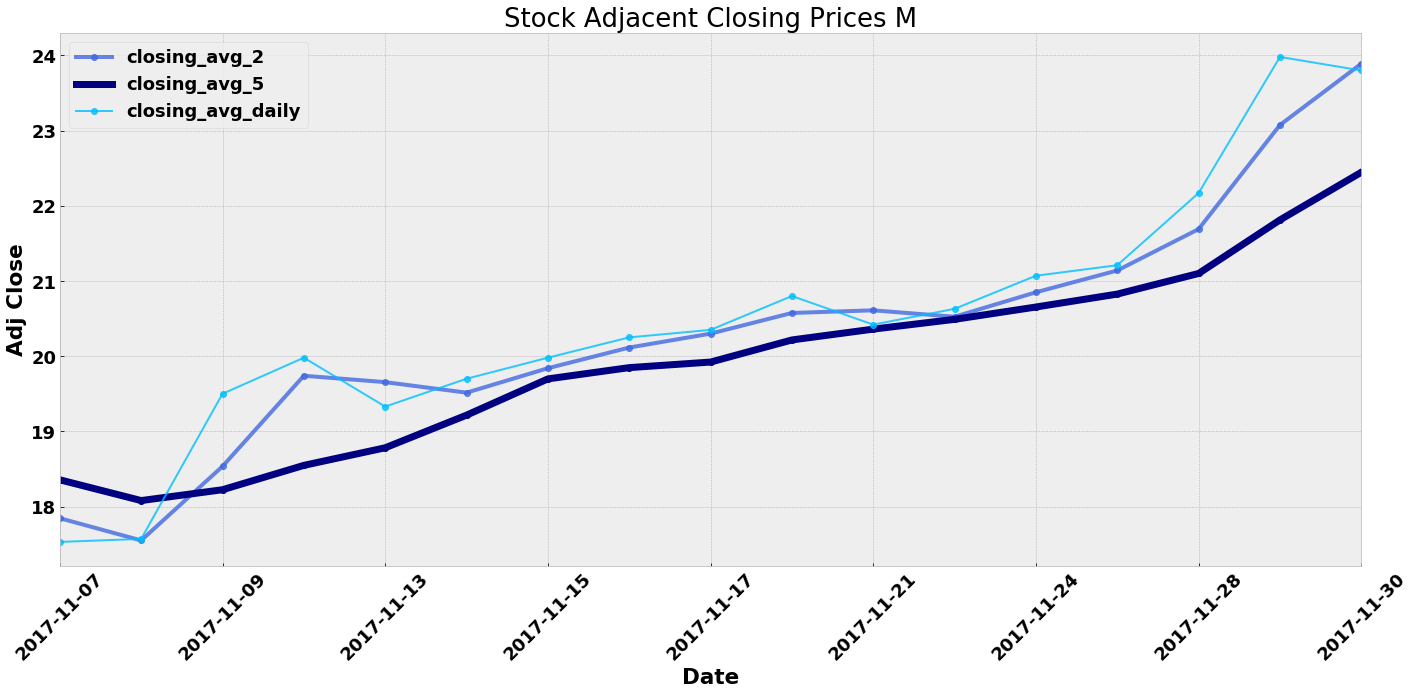

In [6]:
def plot_mvg_stocks(base,df,window_size):
    df.plot(kind="line",x="Date",y="Adj Close",color="green",label="adj closing price",marker="o")
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.title(f"{base}_{window_size}_{ticker}")
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/{base}_{window_size}_{ticker}.png")

tickers = ['AAPL', 'V', 'AMZN', 'WMT', 'NFLX', 'NKE', 'M']

for ticker in tickers:
    df = pd.read_csv(f"data\{ticker}.csv")
    df = df[["Date","Adj Close"]]
    
    df_2 = df.rolling(2).mean()
    df_2 = df_2.rename(columns={"Adj Close":"closing_avg_2"})
    
    df_5 = df.rolling(5).mean()
    df_5 = df_5.rename(columns={"Adj Close":"closing_avg_5"})
    
    df = df.rename(columns={"Adj Close":"closing_avg_daily"})
    
    df = df.merge(df_2,on="Date")
    df = df.merge(df_5,on="Date")
    
    df = df.dropna(how="any")
    
    matplotlib.rcParams.update({'font.size': 16})
    plt.rcParams["font.size"] = 18
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    
    ax = df.plot(kind="line",x="Date",y="closing_avg_2",linewidth=4,figsize=(20,10),alpha=0.80,marker="o",color="royalblue")
    df.plot(kind="line",x="Date",y="closing_avg_5",linewidth=7,ax=ax,marker="o",color="navy")
    df.plot(kind="line",x="Date",y="closing_avg_daily",linewidth=2,ax=ax,marker="o",alpha=0.80,color="deepskyblue")
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.title(f"Stock Adjacent Closing Prices {ticker}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/ppt/Stocks_Closing_{ticker}.png")
    
    plt.show()


In [7]:
def plot_mvg_sentiments(base,df,window_size):
    df.plot(kind="line",x="date",y="compound",color="blue",label="compound",marker="o")
    plt.axhline(0.00)
    plt.xlabel("date")
    plt.ylabel("sentiment")
    plt.title(f"{base}_{window_size}_{key}")
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"figures/{base}_{window_size}_{key}.png")

for key, df in dataframes.items():
    base_file = "Compound_Senti_Mvg"
    plot_mvg_sentiments(base_file,df.rolling(2).mean(),2)
    plot_mvg_sentiments(base_file,df.rolling(5).mean(),5)  


In [13]:
tweet_Stock_map = {"@Apple":"AAPL","@Visa":"V","@amazon":"AMZN","@Walmart":"WMT",'@netflix':"NFLX","@Nike":"NKE",'@Macys':"M"}

stock_tweets_final = pd.DataFrame()

stock_tweets_m_avg = pd.DataFrame()

for handle,sentiment_df in dataframes.items():
    sentiment_df = sentiment_df.rename(columns={"date":"Date"})
    stock_df = pd.read_csv(f"data/{tweet_Stock_map[handle]}.csv")
    stock_df = stock_df[["Date","Adj Close"]]

    stock_df["Date"] = [datetime.strptime(x,"%Y-%m-%d").date() for x in stock_df["Date"]]
    
    stock_df["Company"] = [handle for x in stock_df["Date"]]
    stock_tweets_df = sentiment_df.merge(stock_df, on="Date")
    stock_tweets_final = stock_tweets_final.append(stock_tweets_df)
    
    
    stock_tweets_df = stock_tweets_df.sort_values(['Date'], ascending=True)
    
    stock_tweets_df_rolling_2 =  stock_tweets_df.rolling(2).mean()
    
    stock_tweets_df_rolling_2 = stock_tweets_df_rolling_2.rename(columns = {"compound": "compound_m_avg 2",
                                                                            "Adj Close":"stock_closing_m_avg 2"})
    
    stock_tweets_df_rolling_5 =  stock_tweets_df.rolling(5).mean()
    
    stock_tweets_df_rolling_5 = stock_tweets_df_rolling_5.rename(columns = {"compound": "compound_m_avg 5",
                                                                            "Adj Close":"stock_closing_m_avg 5"})
    
    stock_tweets_df_w_2 = stock_tweets_df.merge(stock_tweets_df_rolling_2,on=["Date","Company"])
    stock_tweets_df_w_5 = stock_tweets_df_w_2.merge(stock_tweets_df_rolling_5,on=["Date","Company"])
    
    stock_tweets_m_avg = stock_tweets_m_avg.append(stock_tweets_df_w_5)
    
    stock_tweets_df_w_5 = stock_tweets_df_w_5.dropna(how="any")
    
    matplotlib.rcParams.update({'font.size': 16})
    plt.rcParams["font.size"] = 18
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    
    ax = stock_tweets_df_w_5.plot(kind="line",x="Date",y="compound_m_avg 5",linewidth=4,figsize=(20,10),alpha=0.80,marker="o",color="royalblue")
    
    ax.set_xlabel('Date (s)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax.set_ylabel("Twitter Sentiments", color='b')
    
    ax.set_title(f"Tweets vs Stocks (5-day Averages) - {handle}")
    ax.legend(loc='upper left')

    ax2 = ax.twinx()
    stock_tweets_df_w_5.plot(kind="line",x="Date",y="stock_closing_m_avg 5",linewidth=4,ax=ax2,figsize=(20,10),alpha=0.80,marker="o",color="tomato")
    ax2.set_ylabel("Stock closing price", color='g')
    
    ax2.legend(loc='upper right')
    
    plt.savefig(f"figures/ppt/TweetsVsStocks(5-day)_{handle}.png")
    plt.show()

    
    
    
stock_tweets_final.to_csv("Summary_Historic_data.csv")
stock_tweets_m_avg.to_csv("Summary_Historic_moving_Averages.csv")

handle_group = stock_tweets_final.groupby("Company")

company_summary = handle_group.mean()

company_summary = company_summary.rename(columns={"compound":"Tweet_sentiment","Adj Close":"Stock_closing_price"})
company_summary

,Tweet_sentiment,Stock_closing_price
Company,,
@Apple,0.007755,172.217526
@Macys,0.391670,19.936000
@Nike,0.091222,57.140728
@Visa,0.063364,111.299942
@Walmart,0.149182,92.934737
@amazon,0.168841,1135.032638
@netflix,0.116251,195.605500


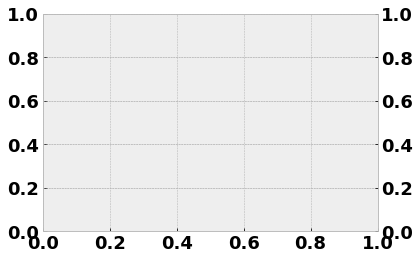

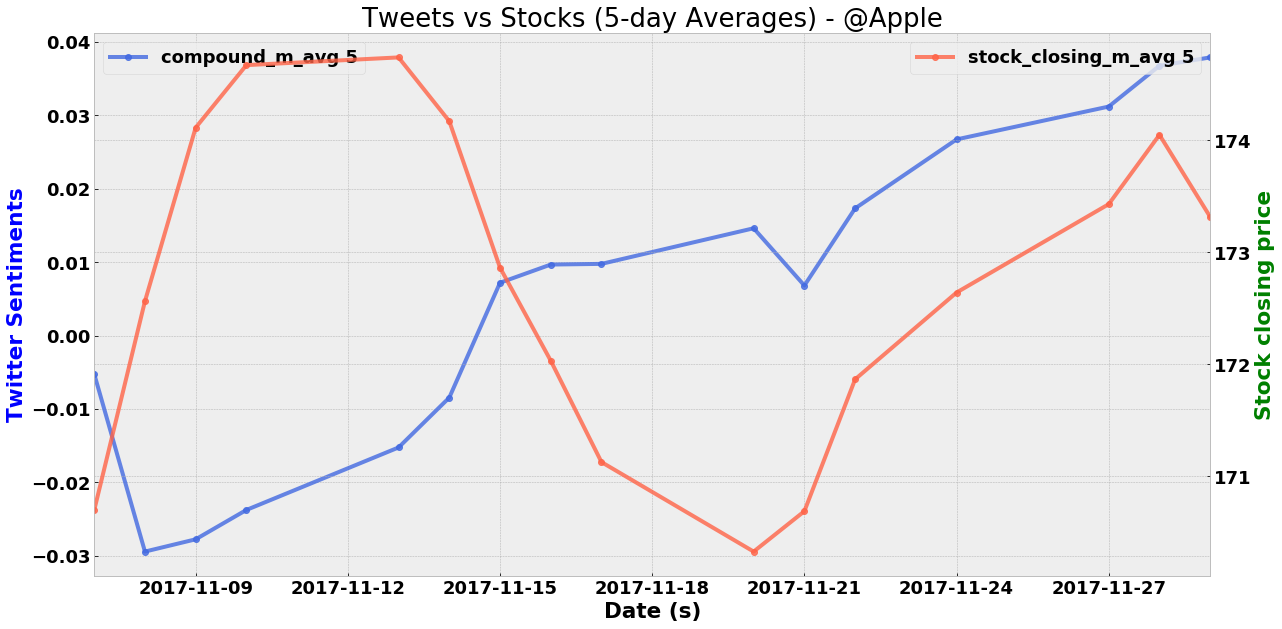

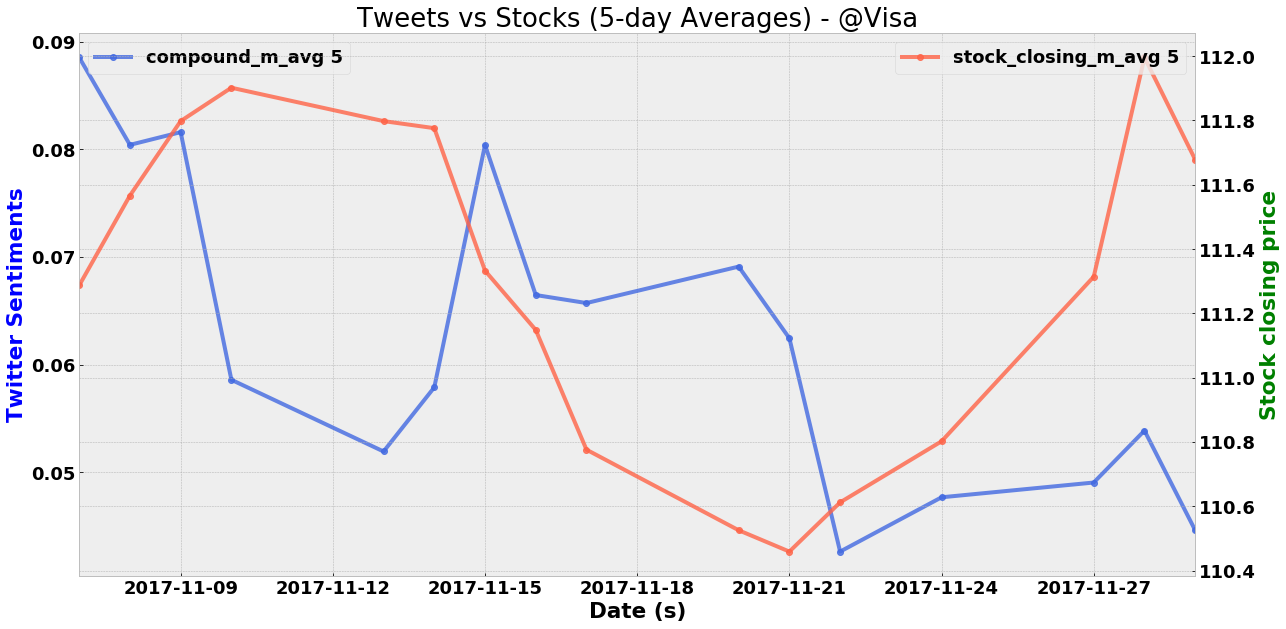

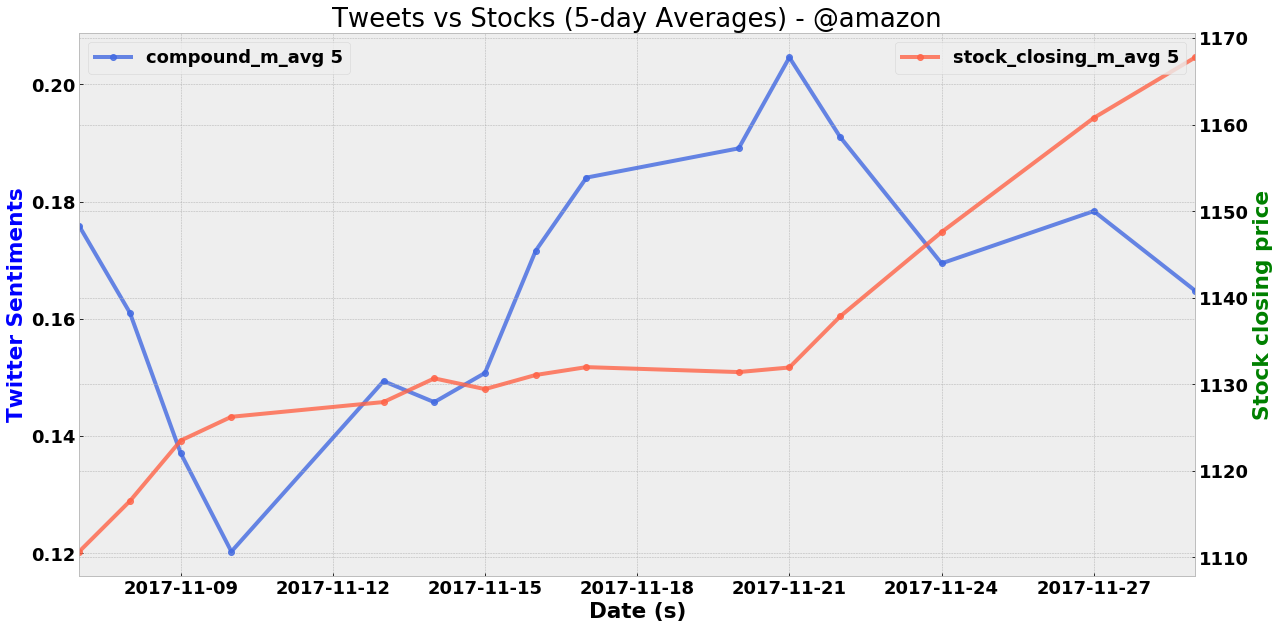

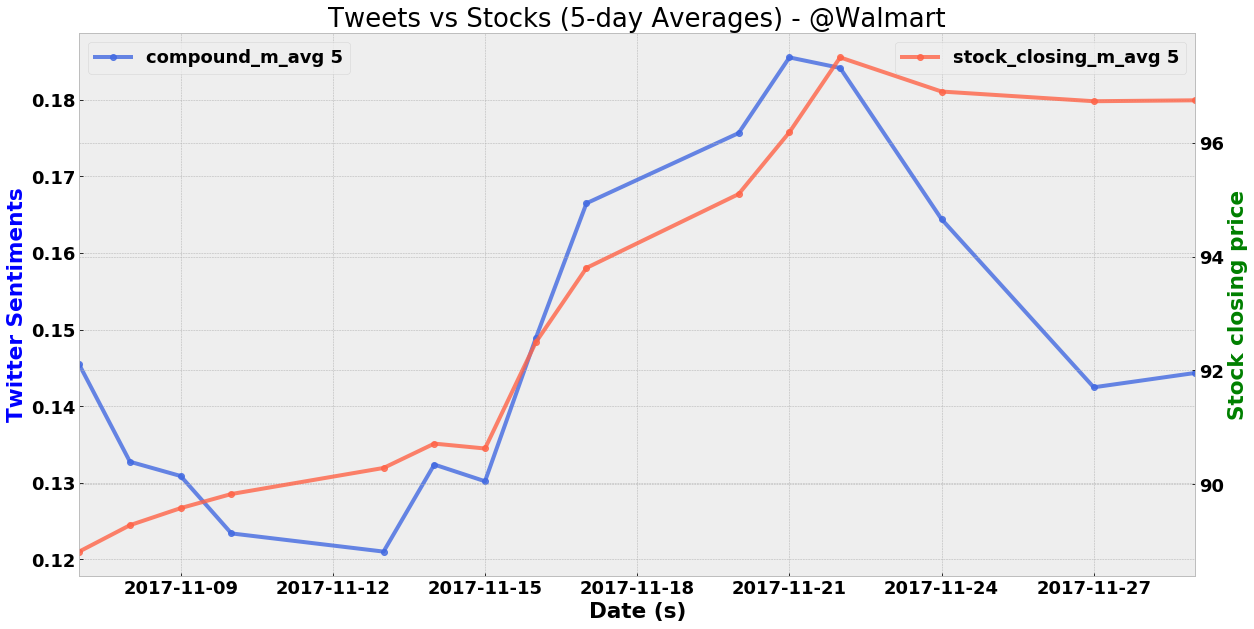

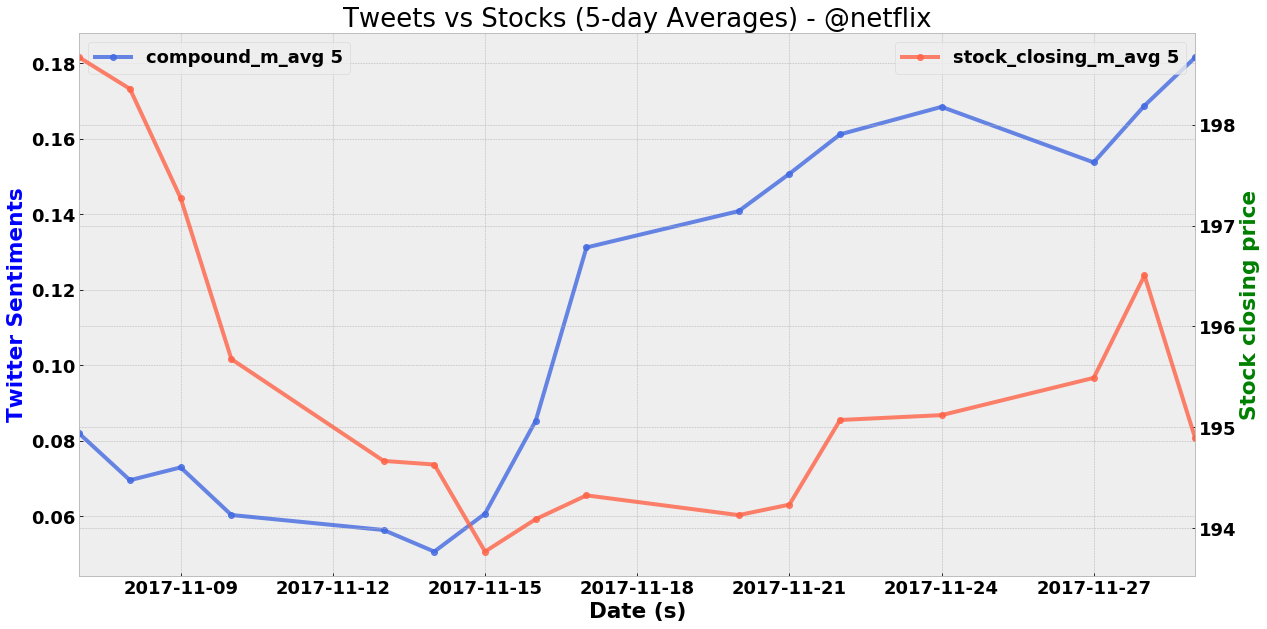

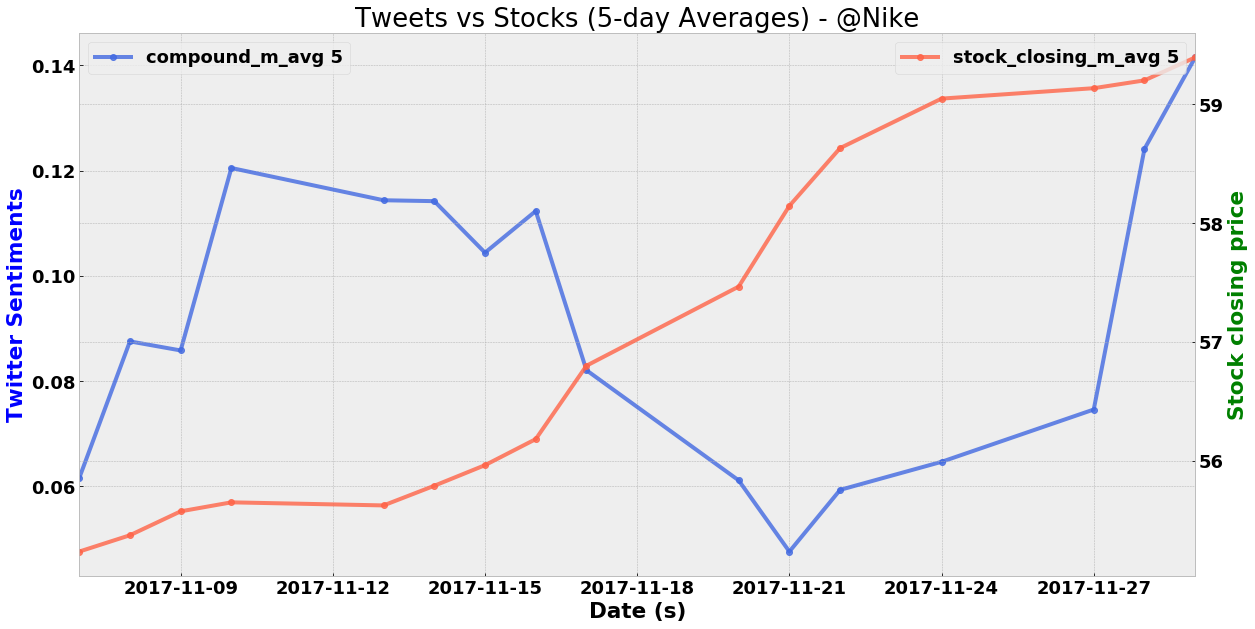

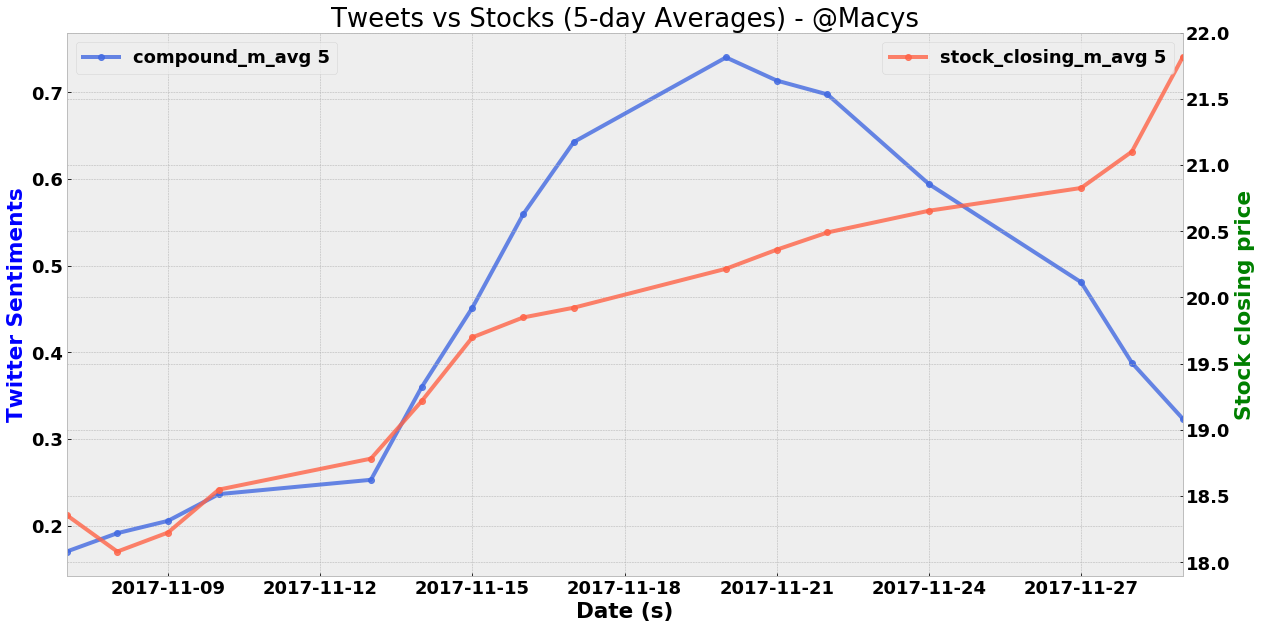

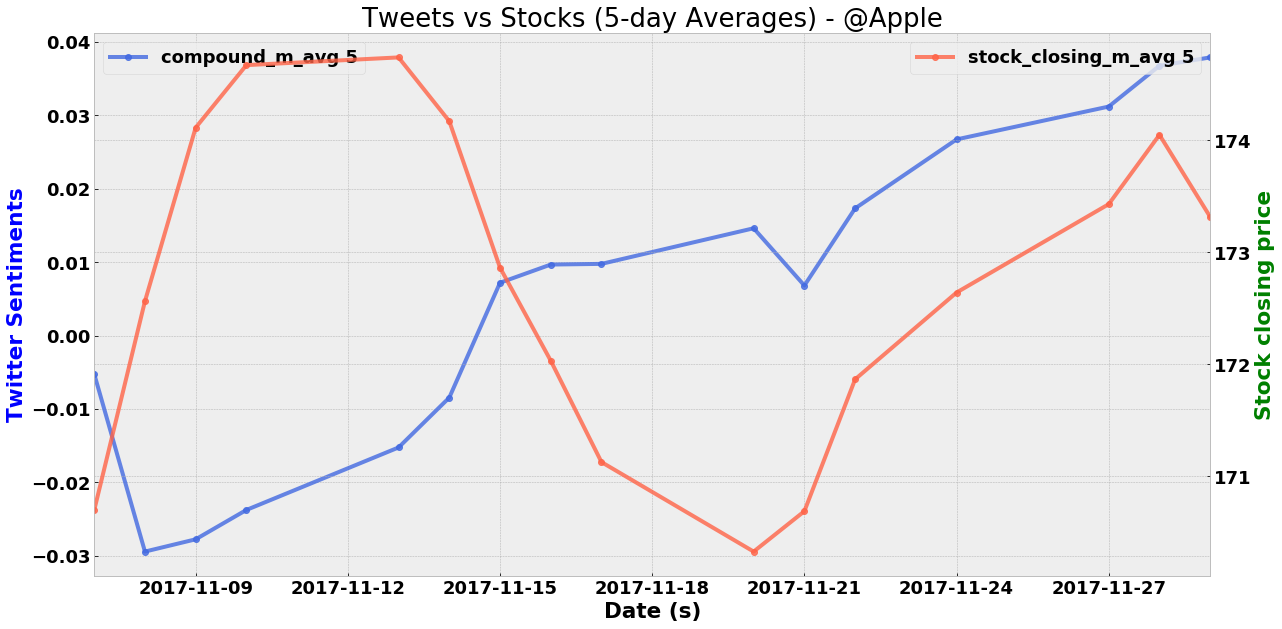

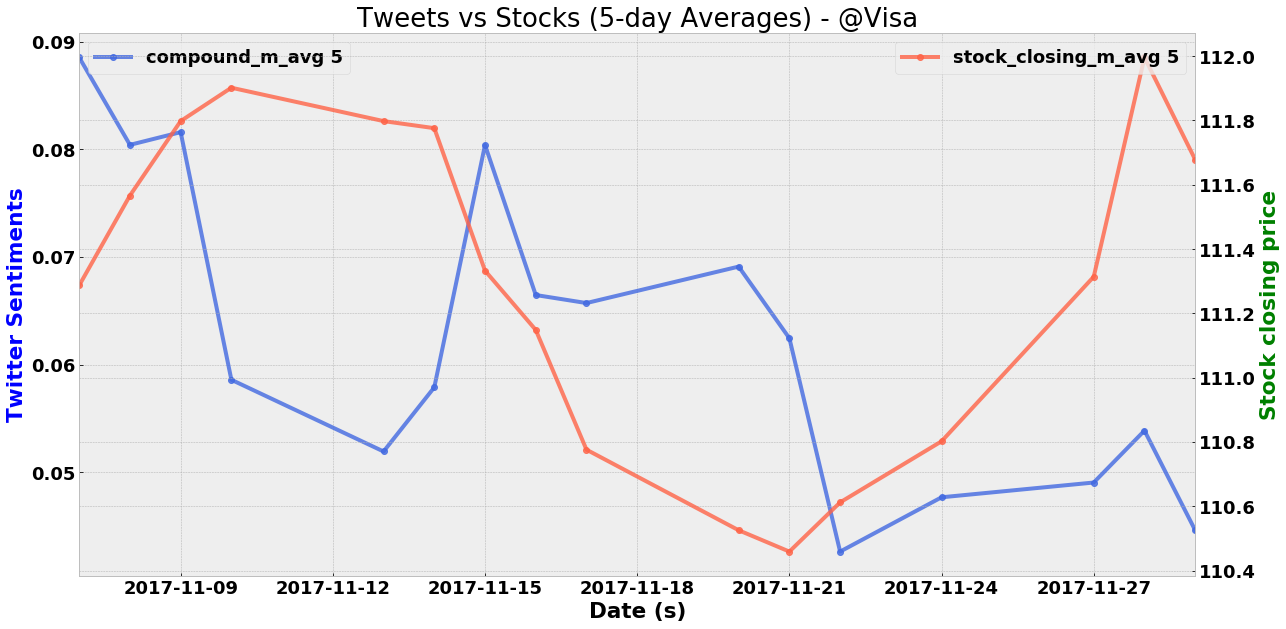

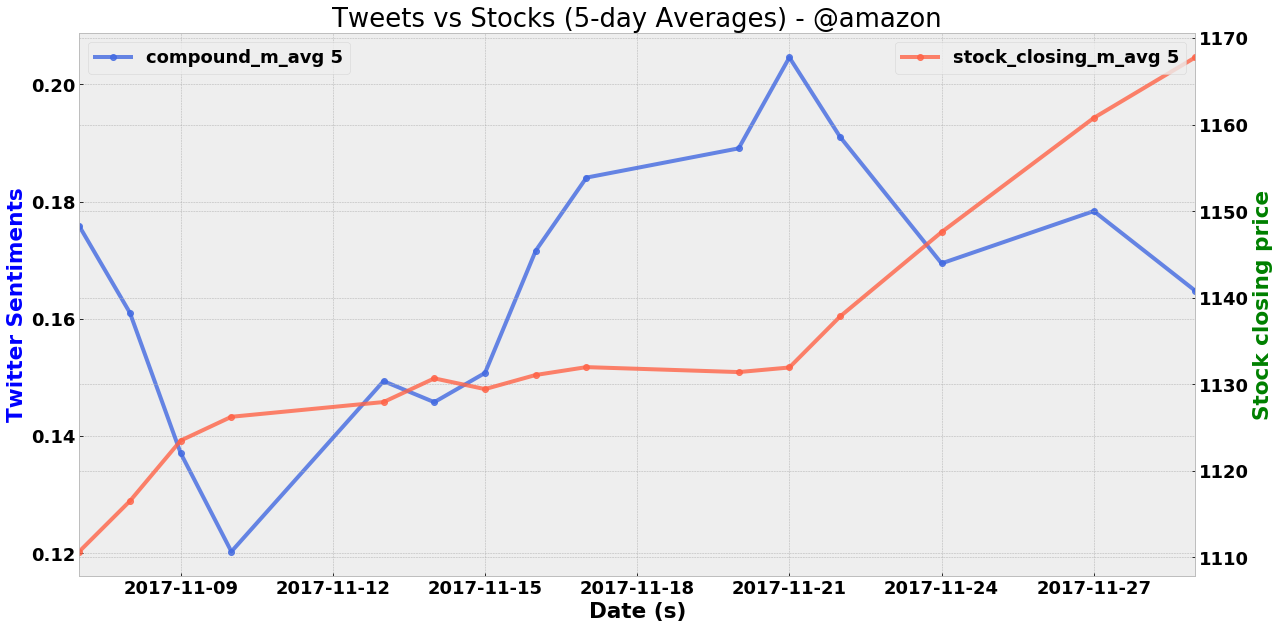

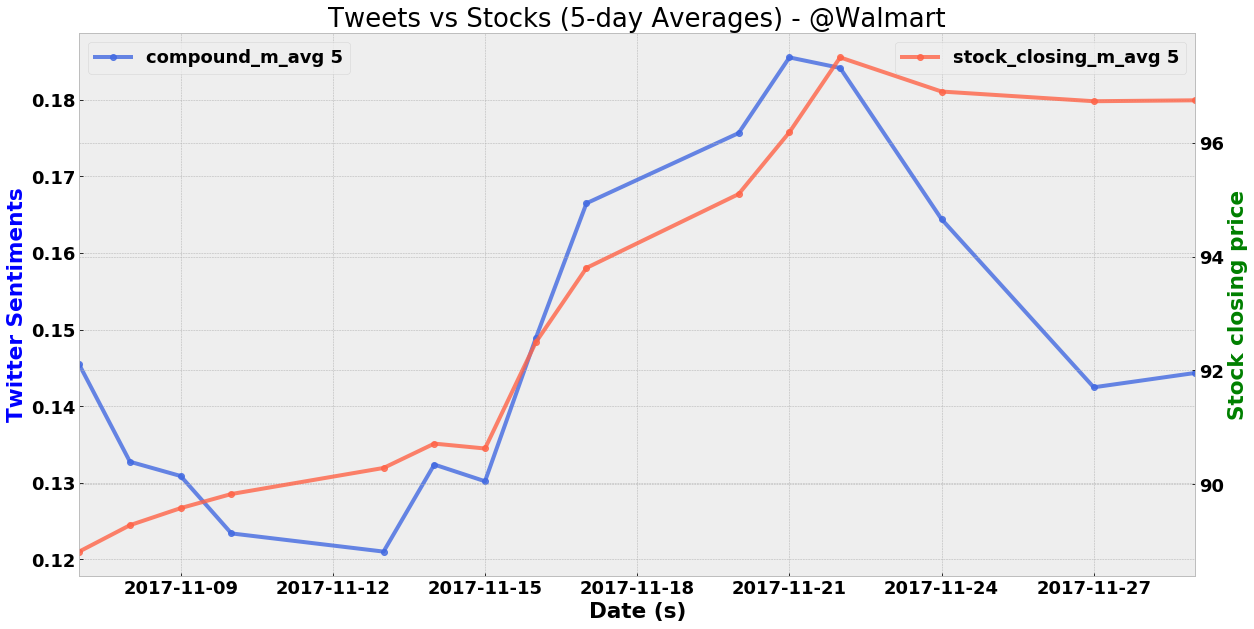

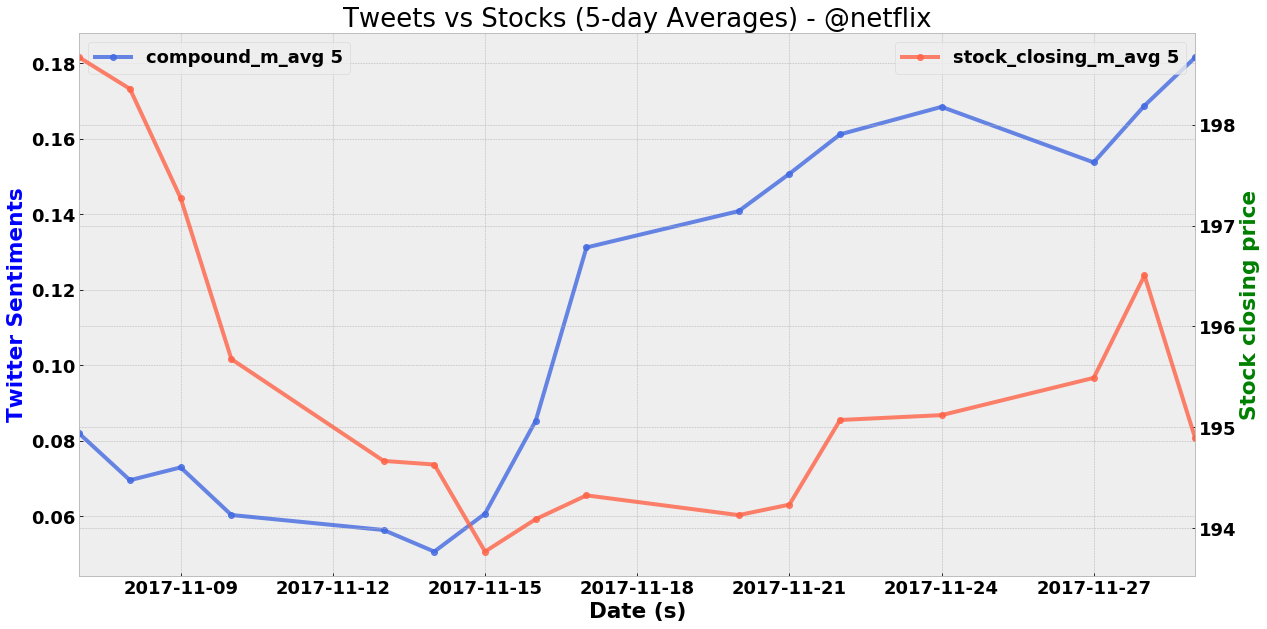

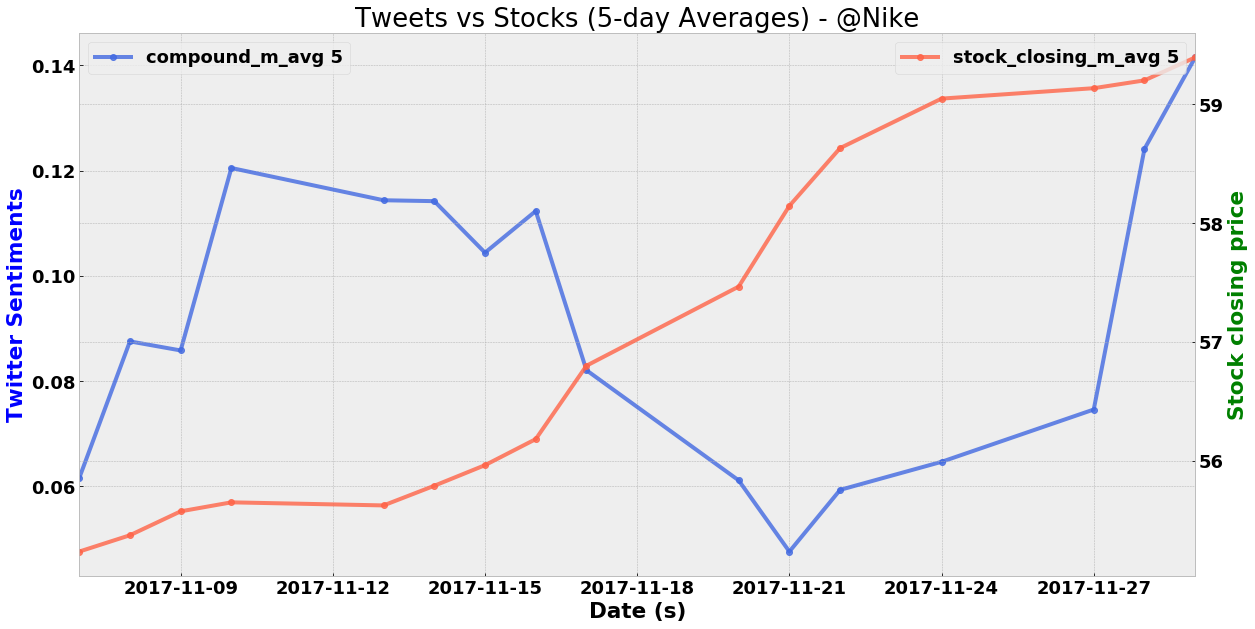

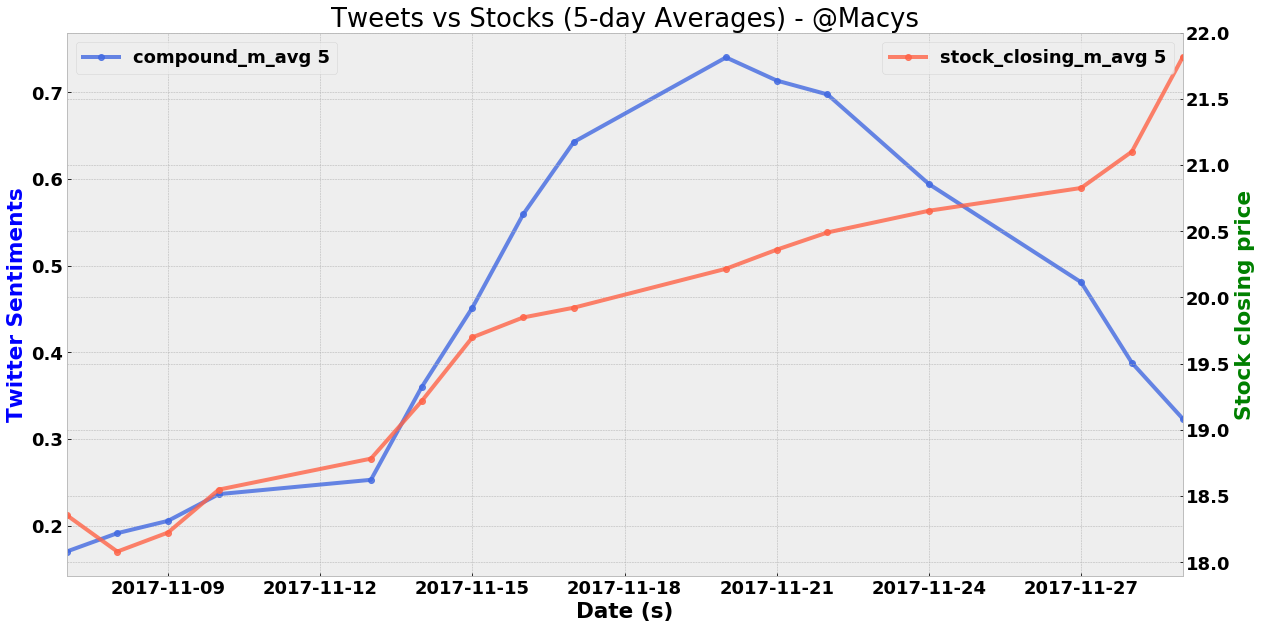

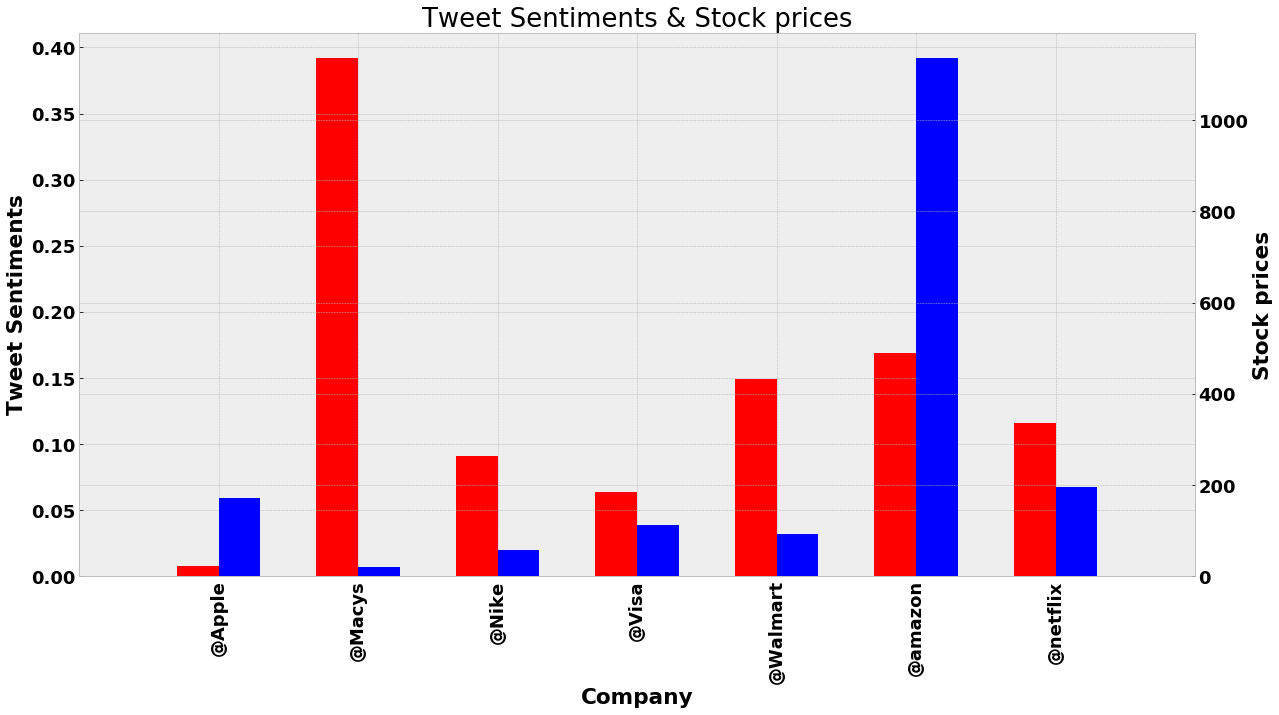

In [14]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

company_summary.Tweet_sentiment.plot(kind='bar', color='red', ax=ax, width=width, position=1,figsize=(20,10))
company_summary.Stock_closing_price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,figsize=(20,10))

ax.set_ylabel('Tweet Sentiments')
ax2.set_ylabel('Stock prices')

ax.set_xlim(-1,len(company_summary))

plt.title("Tweet Sentiments & Stock prices")

plt.savefig("figures/ppt/BarChart_StockSentiments.png")

plt.show()

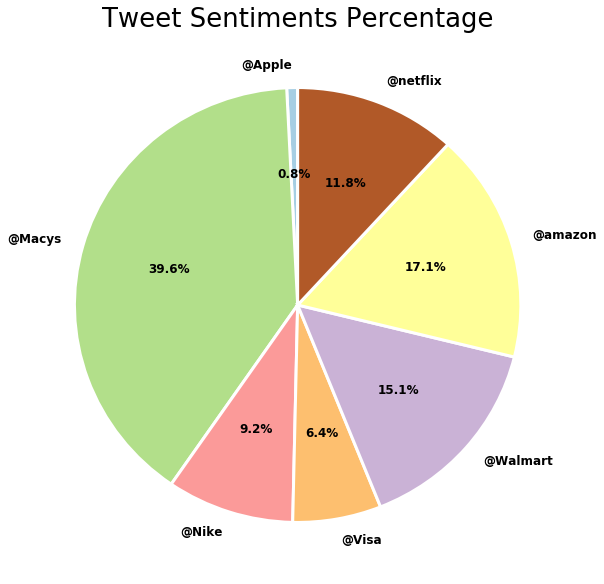

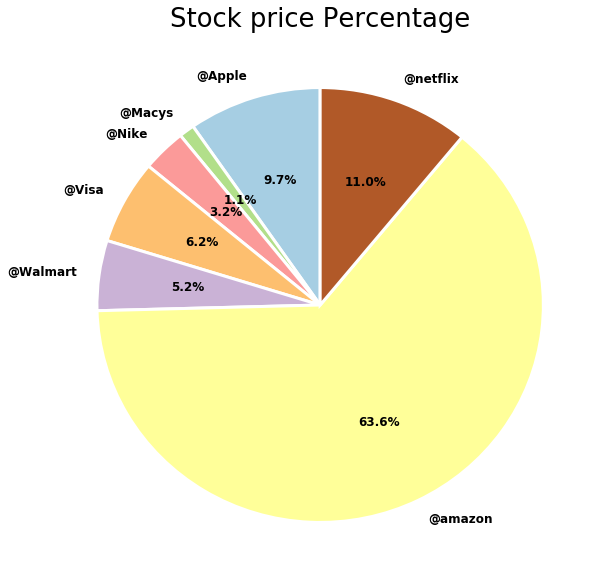

In [15]:
company_summary['Tweet_sentiment'] = company_summary['Tweet_sentiment']*100

company_summary['Tweet_sentiment'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10), legend = False, fontsize=12,cmap = 'Paired',wedgeprops= { 'linewidth' : 3,'edgecolor' : "white" })
plt.ylabel('')
plt.title('Tweet Sentiments Percentage')

plt.savefig("figures/ppt/PieChart_TweetSentiments.png")
plt.show()


company_summary.plot(kind='pie', y = 'Stock_closing_price', autopct='%1.1f%%', startangle=90,figsize=(10,10), legend = False, fontsize=12,cmap = 'Paired',wedgeprops= { 'linewidth' : 3,'edgecolor' : "white" })
plt.ylabel('')
plt.title('Stock price Percentage')
plt.savefig("figures/ppt/PieChart_StockPrices.png")
plt.show()
